In [1]:
sentence = "the little yellow dog barked at the cat."

In [2]:
from nltk import word_tokenize, pos_tag

pos_tag(word_tokenize(sentence))

[('the', 'DT'),
 ('little', 'JJ'),
 ('yellow', 'JJ'),
 ('dog', 'NN'),
 ('barked', 'VBD'),
 ('at', 'IN'),
 ('the', 'DT'),
 ('cat', 'NN'),
 ('.', '.')]

In [3]:
from nltk.help import upenn_tagset

upenn_tagset("DT")

DT: determiner
    all an another any both del each either every half la many much nary
    neither no some such that the them these this those


In [4]:
tagged = pos_tag(word_tokenize(sentence))

In [5]:
from nltk.chunk.regexp import RegexpParser

# ? => 있거나 없거나(1개)
# * => 없거나 여려개 있거나 (0~n)
# + => 1개 이상 있거나 (1~n)
# DT + NN
# NN
# NNP
# DT + NNP
# NP: {<DT>?<JJ.*>*<NN.*>}
rules = RegexpParser("""
NP: {<DT>?<JJ.*>+<NN.*>}
NP: {<DT>?<NN.*>}
""")

parseTree = rules.parse(tagged)

parseTree.draw()

In [ ]:
from konlpy.tag import Kkma

sentence = "내 친구가 잠을 많이 잔다."
tagged = Kkma().pos(sentence)

In [10]:
tagged

[('내', 'NP'),
 ('친구', 'NNG'),
 ('가', 'JKS'),
 ('잠', 'NNG'),
 ('을', 'JKO'),
 ('많이', 'MAG'),
 ('자', 'VV'),
 ('ㄴ다', 'EFN'),
 ('.', 'SF')]

In [13]:
rules = RegexpParser("""
    NP: {<N.*>+<JK.*>}
    VP: {<MA.*>*<VV.*><EF.*>}
""")

rules.parse(tagged).pprint()

rules.parse(tagged).draw()

# parseTree = rules.parse(tagged)

# parseTree.draw()

(S
  (NP 내/NP 친구/NNG 가/JKS)
  (NP 잠/NNG 을/JKO)
  (VP 많이/MAG 자/VV ㄴ다/EFN)
  ./SF)


In [11]:
Kkma().tagset

{'EC': '연결 어미',
 'ECD': '의존적 연결 어미',
 'ECE': '대등 연결 어미',
 'ECS': '보조적 연결 어미',
 'EF': '종결 어미',
 'EFA': '청유형 종결 어미',
 'EFI': '감탄형 종결 어미',
 'EFN': '평서형 종결 어미',
 'EFO': '명령형 종결 어미',
 'EFQ': '의문형 종결 어미',
 'EFR': '존칭형 종결 어미',
 'EP': '선어말 어미',
 'EPH': '존칭 선어말 어미',
 'EPP': '공손 선어말 어미',
 'EPT': '시제 선어말 어미',
 'ET': '전성 어미',
 'ETD': '관형형 전성 어미',
 'ETN': '명사형 전성 어미',
 'IC': '감탄사',
 'JC': '접속 조사',
 'JK': '조사',
 'JKC': '보격 조사',
 'JKG': '관형격 조사',
 'JKI': '호격 조사',
 'JKM': '부사격 조사',
 'JKO': '목적격 조사',
 'JKQ': '인용격 조사',
 'JKS': '주격 조사',
 'JX': '보조사',
 'MA': '부사',
 'MAC': '접속 부사',
 'MAG': '일반 부사',
 'MD': '관형사',
 'MDN': '수 관형사',
 'MDT': '일반 관형사',
 'NN': '명사',
 'NNB': '일반 의존 명사',
 'NNG': '보통명사',
 'NNM': '단위 의존 명사',
 'NNP': '고유명사',
 'NP': '대명사',
 'NR': '수사',
 'OH': '한자',
 'OL': '외국어',
 'ON': '숫자',
 'SE': '줄임표',
 'SF': '마침표, 물음표, 느낌표',
 'SO': '붙임표(물결,숨김,빠짐)',
 'SP': '쉼표,가운뎃점,콜론,빗금',
 'SS': '따옴표,괄호표,줄표',
 'SW': '기타기호 (논리수학기호,화폐기호)',
 'UN': '명사추정범주',
 'VA': '형용사',
 'VC': '지정사',
 'VCN': "부정 지정사, 형용사 '아니다'",
 'VC

In [14]:
for subtree in parseTree.subtrees():
    if subtree.label() == "NP":
        print(subtree)

(NP the/DT little/JJ yellow/JJ dog/NN)
(NP the/DT cat/NN)


In [11]:
sentence = "I shot an elephant in my pajamas"
# sentence = "the dog saw a man in the park"
# sentence = "the angry bear chased the frightened little squirrel"
# sentence = "the littel bear saw the fine trout in the brook"
# pos_tag(word_tokenize(sentence))

tagged = pos_tag(word_tokenize(sentence))

rules = RegexpParser("""
    N: {<NN.*>}
    V: {<VB.*>}    
    Det: {<DT|PRP\$>}
    P: {<IN>}
    NP : {<Det>?<PRP|N>}
    PP : {<P><NP>}
    VP : {<V><NP>}
    VP : {<VP><PP>}
""")

rules.parse(tagged).pprint()

rules.parse(tagged).draw()


(S
  (NP I/PRP)
  (VP
    (VP (V shot/VBP) (NP (Det an/DT) (N elephant/NN)))
    (PP (P in/IN) (NP (Det my/PRP$) (N pajamas/NN)))))


In [14]:
upenn_tagset("JJ.*")

JJ: adjective or numeral, ordinal
    third ill-mannered pre-war regrettable oiled calamitous first separable
    ectoplasmic battery-powered participatory fourth still-to-be-named
    multilingual multi-disciplinary ...
JJR: adjective, comparative
    bleaker braver breezier briefer brighter brisker broader bumper busier
    calmer cheaper choosier cleaner clearer closer colder commoner costlier
    cozier creamier crunchier cuter ...
JJS: adjective, superlative
    calmest cheapest choicest classiest cleanest clearest closest commonest
    corniest costliest crassest creepiest crudest cutest darkest deadliest
    dearest deepest densest dinkiest ...


In [55]:
sentence = "the angry bear chased the frightened little squirrel"
# pos_tag(word_tokenize(sentence))

tagged = pos_tag(word_tokenize(sentence))

rules = RegexpParser("""
    N: {<NN.*>}
    V: {<VB.*>}    
    P: {<IN>}
    Adj : {<JJ.*>}
    Det: {<DT|PRP\$>}
    Nom : {<Adj><N>}    
    Nom : {<Adj><Nom>}
    NP : {<Det>?<PRP|Nom>}
    NP : {<Det>?<N>$}    
    NP : {<Det>?<N><PP>}    
    NP : {<Det>?<N>}
    PP : {<P><NP>}
    VP : {<V><NP>}
    VP : {<VP><PP>}
""")

rules.parse(tagged).pprint()

rules.parse(tagged).draw()

(S
  (NP (Det the/DT) (Nom (Adj angry/JJ) (N bear/NN)))
  (VP
    (V chased/VBD)
    (NP
      (Det the/DT)
      (Nom (Adj frightened/JJ) (Nom (Adj little/JJ) (N squirrel/NN))))))


In [51]:
sentence = "the dog saw a man in the park"

tagged = pos_tag(word_tokenize(sentence))

rules = RegexpParser("""
    N: {<NN.*>}
    V: {<VB.*>}    
    P: {<IN>}
    Adj : {<JJ.*>}
    Det: {<DT|PRP\$>}
    Nom : {<Adj><N>}    
    Nom : {<Adj><Nom>}
    NP : {<Det>?<N>$} 
    NP : {<Det>?<PRP|Nom>}
    PP : {<P><NP>}    
    NP : {<Det>?<N><PP>}  
    NP : {<Det>?<N>}    
    VP : {<V><NP>}
    VP : {<VP><PP>}
""")

rules.parse(tagged).pprint()

rules.parse(tagged).draw()

(S
  (NP (Det the/DT) (N dog/NN))
  (VP
    (V saw/VBD)
    (NP
      (Det a/DT)
      (N man/NN)
      (PP (P in/IN) (NP (Det the/DT) (N park/NN))))))


In [54]:
sentence = "the littel bear saw the fine fat trout in the brook"

tagged = pos_tag(word_tokenize(sentence))

rules = RegexpParser("""
    N: {<NN.*>}
    V: {<VB.*>}    
    P: {<IN>}
    Adj : {<JJ.*>}
    Det: {<DT|PRP\$>}
    Nom : {<Adj><N>}    
    Nom : {<Adj><Nom>}
    NP : {<Det>?<N>$} 
    NP : {<Det>?<PRP|Nom>}
    PP : {<P><NP>}    
    NP : {<Det>?<N><PP>}  
    NP : {<Det>?<N>}    
    VP : {<V><NP>}
    VP : {<VP><PP>}
""")

rules.parse(tagged).pprint()

rules.parse(tagged).draw()

(S
  (NP (Det the/DT) (N littel/NN))
  (NP (N bear/NN))
  (VP (V saw/VBD) (NP (Det the/DT) (Nom (Adj fine/JJ) (N fat/NN))))
  (NP (N trout/NN) (PP (P in/IN) (NP (Det the/DT) (N brook/NN)))))


In [56]:
from nltk.help import brown_tagset

In [57]:
sentence = "the littel bear saw the fine fat trout in the brook"

tagged = pos_tag(word_tokenize(sentence))

rules = RegexpParser("""
    N: {<NN.*>}
    V: {<VB.*>}    
    P: {<IN>}
    Adj : {<JJ.*>}
    Det: {<DT|PRP\$>}
    Nom : {<Adj><N>}    
    Nom : {<Adj><Nom>}
    NP : {<Det>?<N>$} 
    NP : {<Det>?<PRP|Nom>}
    PP : {<P><NP>}    
    NP : {<Det>?<N><PP>}  
    NP : {<Det>?<N>}    
    VP : {<V><NP>}
    VP : {<VP><PP>}
""")

rules.parse(tagged).pprint()

rules.parse(tagged).draw()

(S
  (NP (Det the/DT) (N littel/NN))
  (NP (N bear/NN))
  (VP (V saw/VBD) (NP (Det the/DT) (Nom (Adj fine/JJ) (N fat/NN))))
  (NP (N trout/NN) (PP (P in/IN) (NP (Det the/DT) (N brook/NN)))))


In [58]:
!pip install wordcloud

In [59]:
from konlpy.corpus import kolaw

corpus = kolaw.open(kolaw.fileids()[0]).read()

In [60]:
from konlpy.tag import Kkma

In [72]:
tokens = [_[0] for _ in Kkma().pos(corpus) if len(_[0]) > 1 and not _[1].startswith("E")]

In [73]:
from nltk import Text

textObj = Text(tokens)

In [74]:
textObj.vocab().most_common(20)

[('법률', 121),
 ('정하', 88),
 ('대통령', 84),
 ('의하', 83),
 ('국가', 73),
 ('헌법', 69),
 ('국민', 69),
 ('또는', 69),
 ('으로', 57),
 ('국회', 55),
 ('아니하', 53),
 ('관하', 53),
 ('회의', 42),
 ('모든', 37),
 ('위하', 33),
 ('가지', 32),
 ('필요', 31),
 ('위원', 31),
 ('국무', 30),
 ('기타', 26)]

In [75]:
from wordcloud import WordCloud

path = 'C:/Windows/Fonts/malgun.ttf'

wc = WordCloud(font_path=path, max_words=20)

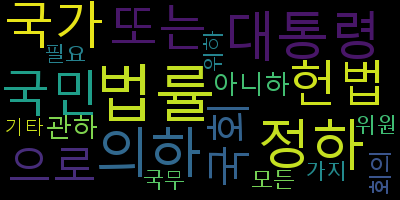

In [76]:
wc.generate_from_frequencies(textObj.vocab())
wc.to_image()

In [77]:
wc = WordCloud(font_path=path, max_words=20, background_color="white")

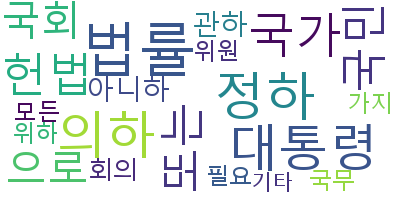

In [78]:
wc.generate_from_frequencies(textObj.vocab())
wc.to_image()

In [79]:
tokens = [_[0] for _ in Kkma().pos(corpus) if len(_[0]) > 1 and _[1].startswith("NN")]

In [80]:
textObj = Text(tokens)
textObj.vocab().most_common(20)

[('법률', 121),
 ('대통령', 84),
 ('국가', 73),
 ('헌법', 69),
 ('국민', 69),
 ('국회', 55),
 ('회의', 42),
 ('필요', 31),
 ('위원', 31),
 ('국무', 30),
 ('기타', 26),
 ('선거', 26),
 ('보장', 24),
 ('정부', 23),
 ('사항', 23),
 ('의원', 23),
 ('자유', 21),
 ('권리', 21),
 ('모든', 21),
 ('의무', 20)]

In [81]:
wc = WordCloud(font_path=path, max_words=40, background_color="white")

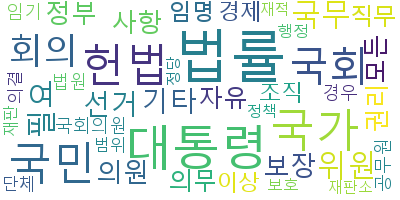

In [82]:
wc.generate_from_frequencies(textObj.vocab())
wc.to_image()

In [89]:
import os

corpus = ""

for _ in  os.listdir("../data"):
    if _.endswith(".txt") and _.startswith("경제"):
        with open("../data/"+_, encoding="utf-8") as f:
            corpus += f.read()
            
tokens = [_[0] for _ in Kkma().pos(corpus) if len(_[0]) > 1 and _[1].startswith("NN")]            

In [90]:
from nltk import Text

textObj = Text(tokens)
textObj.vocab().most_common(20)

[('조사', 71),
 ('지진', 71),
 ('뉴스', 56),
 ('포항', 41),
 ('관련', 39),
 ('기자', 39),
 ('지열', 39),
 ('정부', 39),
 ('추가', 38),
 ('기업', 37),
 ('서울', 36),
 ('중국', 36),
 ('수수료', 35),
 ('현대', 34),
 ('공장', 32),
 ('미국', 32),
 ('보험', 31),
 ('연합', 27),
 ('사업', 26),
 ('업계', 25)]

In [91]:
wc = WordCloud(font_path=path, max_words=40, background_color="white")

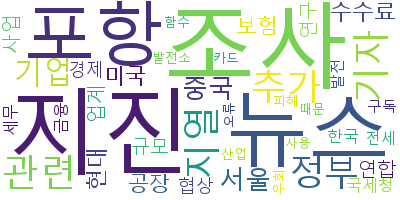

In [92]:
wc.generate_from_frequencies(textObj.vocab())
wc.to_image()

In [93]:
corpus = ""

for _ in  os.listdir("../data"):
    if _.endswith(".txt") and _.startswith("생활문화"):
        with open("../data/"+_, encoding="utf-8") as f:
            corpus += f.read()
            
tokens = [_[0] for _ in Kkma().pos(corpus) if len(_[0]) > 1 and _[1].startswith("NN")]   

In [95]:
textObj = Text(tokens)

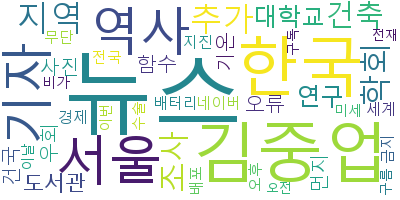

In [96]:
termList = textObj.vocab()

wc.generate_from_frequencies(termList)
wc.to_image()

[모델작업](http://www.cs.virginia.edu/~hw5x/Course/IR2015/_site/lectures/